# **Importation de librairies requises**   
```pandas``` pour la manipulation des dataframes  
```numpy``` pour le calcule matricielle  
**le modèle (logitic regression):** ```LogisticRegression```  
**le modèle (K-NN):** ```neighbors```  
```train_test_split``` pour l'echantillonnage  
```cross_val_score``` pour la validation croisée  
```RFE``` pour la sélection d'attributs  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn_porter import Porter

ModuleNotFoundError: No module named 'sklearn_porter'

In [4]:
pwd

'C:\\Users\\dell'

# **Importation de la dataset**  
La dataset proviens du site Kaggle, c'est une dataset de 398 echantillions, 330 attributs  
Lien de la dataset : https://www.kaggle.com/xwolf12/datasetandroidpermissions#train.csv  
Penser à changer le chemin absolue pour importer la dataset

In [7]:
#lecture de la dataset à partir d'un chemin absolue
dataset = pd.read_csv(r"C:\Users\NSS3112\Desktop\projet\ML\Model training notebook\datasetandroidpermissions\dataset.csv")
dataset.shape
print(len(dataset))
print(len(dataset[dataset.type==0]))
print(len(dataset[dataset.type==1]))

398
199
199


# **Description de la dataset**
Coup d'oeil sur la dataset : La dataset proviens est une liste de permission que demande les applications l'hors de leur installation, ces application sont étiquetées avec l'attribut 'type' qui prend la valeur de 1 pour un malware ou de 0 pour une application benigne (non malware).

In [8]:
dataset.iloc[50:60,76:]

,android.permission.CALL_PHONE,android.permission.CALL_PRIVILEGED,android.permission.CAMERA,android.permission.CAMERA_DISABLE_TRANSMIT_LED,android.permission.CAPTURE_AUDIO_HOTWORD,android.permission.CAPTURE_AUDIO_OUTPUT,android.permission.CAPTURE_SECURE_VIDEO_OUTPUT,android.permission.CAPTURE_TV_INPUT,android.permission.CAPTURE_VIDEO_OUTPUT,android.permission.CARRIER_FILTER_SMS,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
57,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
dataset.describe(include="all")

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005025,0.0,0.233668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070799,0.0,0.423696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500629
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


# **Echantillonnage**
On sépare nos données en **TrainingSet** et **TestingSet** afin d'évaluer notre model avec des données qu'illui sont inconnues,
on consacre 80% pour l'entrainement et le reste pour l'évaluation  
Mais on utilisera la validation croisée

In [10]:
x_train,x_test, y_train, y_test = train_test_split(dataset.drop(columns={"type"}),dataset.type,train_size=0.8)
X = dataset.drop(columns={"type"})
y = dataset.type

# **Définition des modèle**
Les modèle utilisés sont le K-NN et la regression logistique avec comme optimiseur le gradiant stochastique (variante de la descente du gradiant) idéale pour les datasets a large nombre d'attributs

# Entrainemet du K-NN

In [12]:
#fonction calucule de moyenne pour validaton croisée
def moyenne(entree):
    s = 0
    for i in entree:
        s = s + i
    return s/len(entree)


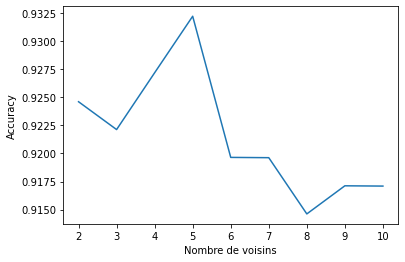

In [13]:
scores = []
for k in range(2,11):
    modelK = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores.append(moyenne(cross_val_score(modelK,X,y,cv=4)))
plt.plot(range(2,11), scores)
plt.xlabel("Nombre de voisins")
plt.ylabel("Accuracy")
plt.show()

In [14]:
modelK = neighbors.KNeighborsClassifier(n_neighbors=5)
print("Accuracy",moyenne(cross_val_score(modelK,X,y,cv=4)))

Accuracy 0.9321969696969696


# Entrainement de la régression logistique

In [15]:
#entrainement sans régularisation
model = LogisticRegression(solver="lbfgs", penalty="none", max_iter=250)
print("Accuracy sans régularisation",moyenne(cross_val_score(model,X,y,cv=5)))

#entrainement avec régularisation
model = LogisticRegression(solver="lbfgs", penalty="l2", max_iter=250)
print("Accucy avec régularisation",moyenne(cross_val_score(model,X,y,cv=5)))

Accuracy sans régularisation 0.9322151898734177
Accucy avec régularisation 0.9423417721518987


# Feature selection


In [16]:
#elimination des variables a variance zero
for attribut in X.columns:
    if X[attribut].var() == 0:
        X = X.drop(columns={attribut})

In [20]:
#recursive feature elimination
#nombre d'attributs
nof_list=np.arange(25,93)            
high_score=0
#pour sauvgarder l'optimal
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression(solver="lbfgs",penalty="l2",max_iter=250)
    rfe = RFE(model,nof_list[n])
    X_rfe = rfe.fit_transform(X,y)
    score = moyenne(cross_val_score(model,X_rfe,y,cv=5))
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]


print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

C:\Users\NSS3112\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\NSS3112\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=26 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KeyboardInterrupt: 

<function matplotlib.pyplot.show(*args, **kw)>

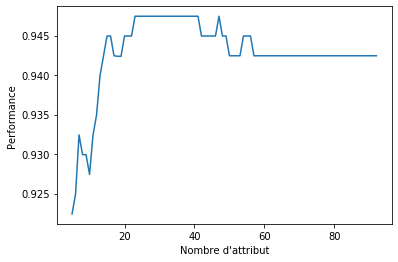

In [18]:
#modélisation du résultat
plt.plot(range(5,93),score_list[:],markersize=3)
plt.xlabel("Nombre d'attribut")
plt.ylabel("Performance")
plt.show

In [19]:
#selection des attribut finaux
cols = list(X.columns)
rfe = RFE(model, 23)             #Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  #Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe= temp[temp==True].index
print(selected_features_rfe)

Index(['android.permission.BLUETOOTH', 'android.permission.CAMERA',
       'android.permission.CHANGE_WIFI_STATE',
       'android.permission.DEVICE_POWER',
       'android.permission.DISABLE_KEYGUARD', 'android.permission.GET_TASKS',
       'android.permission.INSTALL_PACKAGES', 'android.permission.INTERNET',
       'android.permission.MODIFY_AUDIO_SETTINGS',
       'android.permission.MOUNT_UNMOUNT_FILESYSTEMS',
       'android.permission.READ_CALENDAR', 'android.permission.READ_CALL_LOG',
       'android.permission.READ_PHONE_STATE', 'android.permission.READ_SMS',
       'android.permission.RECEIVE_BOOT_COMPLETED',
       'android.permission.SEND_SMS',
       'android.permission.SET_PREFERRED_APPLICATIONS',
       'android.permission.USE_CREDENTIALS', 'android.permission.WAKE_LOCK',
       'android.permission.WRITE_APN_SETTINGS',
       'android.permission.WRITE_SETTINGS', 'android.permission.WRITE_SMS',
       'com.android.browser.permission.READ_HISTORY_BOOKMARKS'],
      dtype='o

In [20]:
X = X[['android.permission.BLUETOOTH', 'android.permission.CAMERA',
       'android.permission.CHANGE_WIFI_STATE',
       'android.permission.DEVICE_POWER',
       'android.permission.DISABLE_KEYGUARD', 'android.permission.GET_TASKS',
       'android.permission.INSTALL_PACKAGES', 'android.permission.INTERNET',
       'android.permission.MODIFY_AUDIO_SETTINGS',
       'android.permission.MOUNT_UNMOUNT_FILESYSTEMS',
       'android.permission.READ_CALENDAR', 'android.permission.READ_CALL_LOG',
       'android.permission.READ_PHONE_STATE', 'android.permission.READ_SMS',
       'android.permission.RECEIVE_BOOT_COMPLETED',
       'android.permission.SEND_SMS',
       'android.permission.SET_PREFERRED_APPLICATIONS',
       'android.permission.USE_CREDENTIALS', 'android.permission.WAKE_LOCK',
       'android.permission.WRITE_APN_SETTINGS',
       'android.permission.WRITE_SETTINGS', 'android.permission.WRITE_SMS',
       'com.android.browser.permission.READ_HISTORY_BOOKMARKS']]
X

,android.permission.BLUETOOTH,android.permission.CAMERA,android.permission.CHANGE_WIFI_STATE,android.permission.DEVICE_POWER,android.permission.DISABLE_KEYGUARD,android.permission.GET_TASKS,android.permission.INSTALL_PACKAGES,android.permission.INTERNET,android.permission.MODIFY_AUDIO_SETTINGS,android.permission.MOUNT_UNMOUNT_FILESYSTEMS,...,android.permission.READ_SMS,android.permission.RECEIVE_BOOT_COMPLETED,android.permission.SEND_SMS,android.permission.SET_PREFERRED_APPLICATIONS,android.permission.USE_CREDENTIALS,android.permission.WAKE_LOCK,android.permission.WRITE_APN_SETTINGS,android.permission.WRITE_SETTINGS,android.permission.WRITE_SMS,com.android.browser.permission.READ_HISTORY_BOOKMARKS
0,0,0,0,0,1,0,0,1,0,0,...,1,1,1,0,0,1,1,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,0,0,1,0,0,1,0,0,...,1,1,1,0,0,1,1,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,1,1,1,0,0,1,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
394,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


# Déploiement du modèle finale
Ici nous allons séraliser notre modèle afin de l'exporter pour le déploiement qui se fera sur un scripte python flask

In [21]:
#Etrainement finale
model = LogisticRegression(solver="lbfgs", penalty="l2", max_iter=100)
model.fit(X,y)

#Sérialisation
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']

In [22]:
inpt_list = [0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0]
inpt = np.array([inpt_list])
print(model.predict(inpt)[0])

0
